# MILPRouter example

This notebook demonstrates how to use `OptiWindNet` to design collector system cable layouts using the **MILPRouter with OR-Tools Solver**.

## Load data

import required modules

In [14]:
from optiwindnet.api import WindFarmNetwork, EWRouter, MILPRouter

In [15]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

create an instance of `wfn` using `.from_pbf()`


In [16]:
wfn = WindFarmNetwork.from_pbf(filepath='data/DTU_letters.osm.pbf', cables=7)

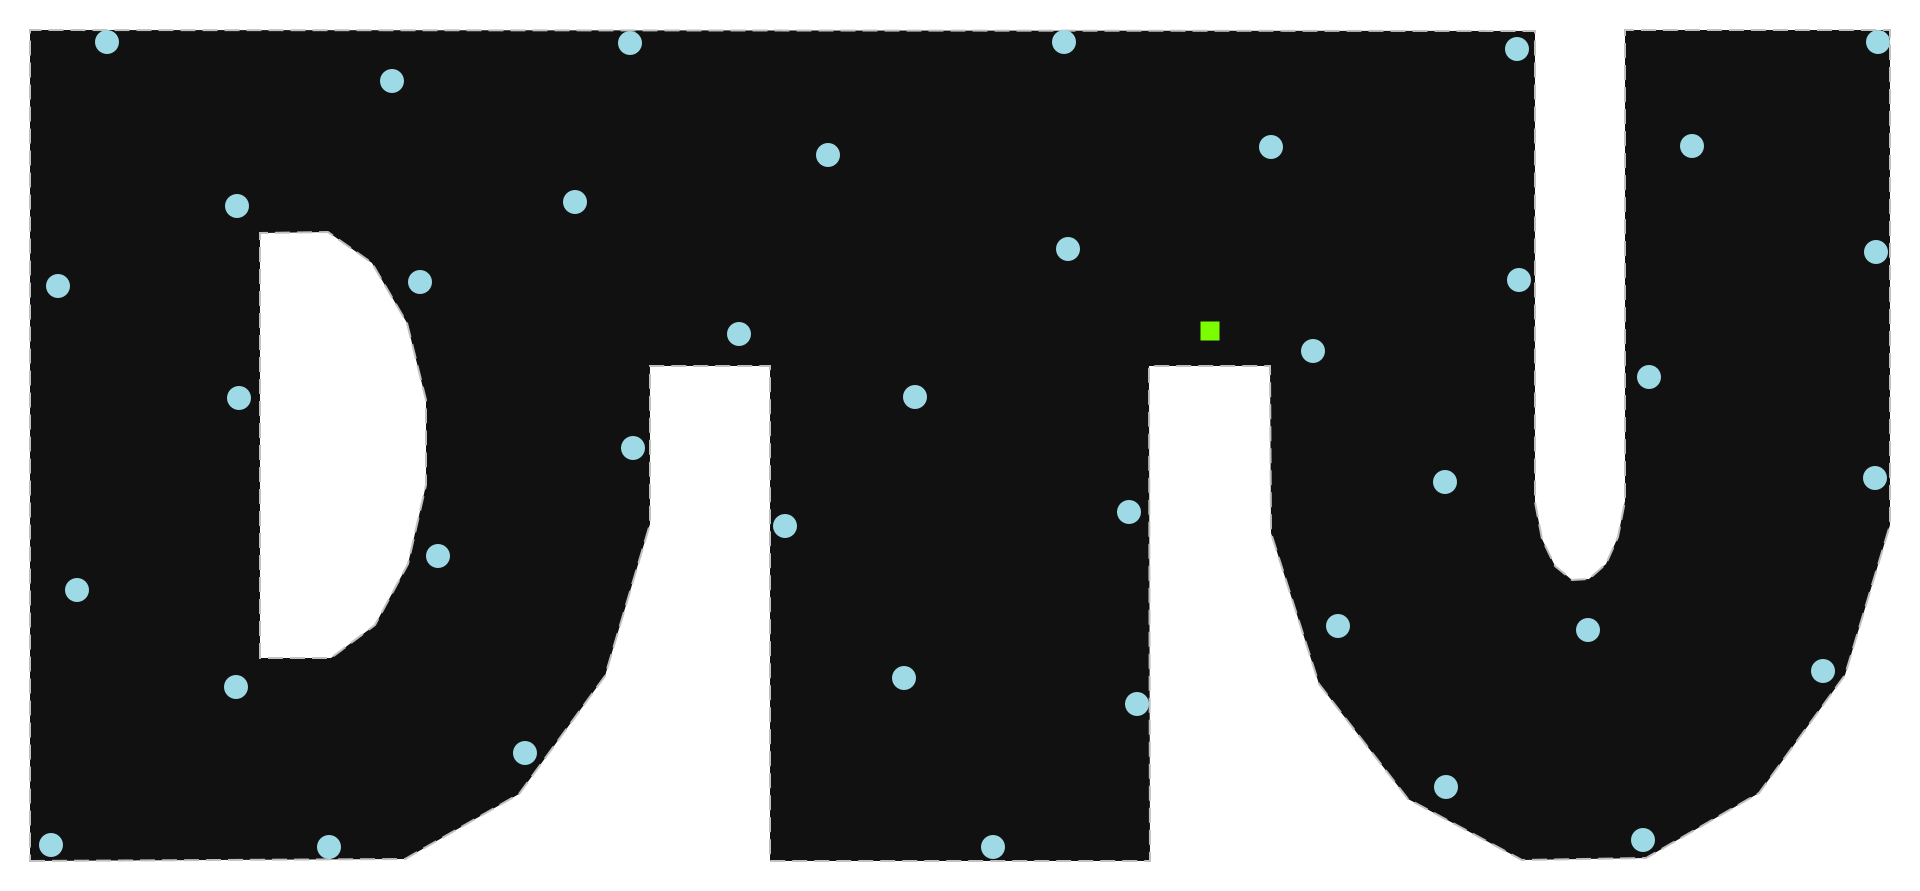

In [17]:
wfn

## Optimize

Warmstart with `EWRouter`:

>Note: In OptiWindNet, `MILPRouter` automatically uses any existing feasible network and check if it is eligible as a **warm start** for the MILP solver. If eligible, the MILP model will be warmstarted from the existing network. Therefore, to warm-start a newly created `WindFarmNetwork`, simply run one optimization with any router (e.g., `EWRouter` or `HGSRouter`) to obtain an initial solution; subsequent runs with `MILPRouter` will pick it up automatically.

In [18]:
res_warmstart= wfn.optimize(router=EWRouter())

In [19]:
wfn.length()

1820.1681190424422

The syntax for defining a MILPRouter is:

```python
router = MILPRouter(solver_name='ortools', time_limit=60, mip_gap=0.005, verbose=True)
```
The solver name could be choosen from among following solvers:
```python
solver_name = 'ortools'
solver_name = 'gurobi'
solver_name = 'cbc'
solver_name = 'cplex'
solver_name = 'highs'
solver_name = 'scip'
```

Rest of arguments (time_limit, mip_gap, verbose) are the same for all solvers.

In this example we use 'ortools' which is an opensource tool. You can easily use other solvers (note that depending on your problem size, you might need license for some of the solvers, e.g. cplex, gurobi)

In [20]:
router = MILPRouter(solver_name='ortools', time_limit=60, mip_gap=0.005, verbose=True)

In [21]:
res = wfn.optimize(router=router)

Using warm start: the model is initialized with the provided solution S.


Starting CP-SAT solver v9.14.6206
Parameters: max_time_in_seconds: 60 log_search_progress: true relative_gap_limit: 0.005
Setting number of workers to 8

Initial optimization model '': (model_fingerprint: 0x8f9424826fd0fab8)
#Variables: 708 (#bools: 354 in floating point objective) (628 primary variables)
  - 354 Booleans in [0,1]
  - 314 in [0,6]
  - 40 in [0,7]
#kAtMostOne: 262 (#literals: 776)
#kLinear1: 708 (#enforced: 708)
#kLinear3: 1
#kLinearN: 122 (#terms: 1'767)

Starting presolve at 0.00s
The solution hint is complete and is feasible.
[Scaling] Floating point objective has 354 terms with magnitude in [18.5198, 233.655] average = 64.9733
[Scaling] Objective coefficient relative error: 2.56462e-08
[Scaling] Objective worst-case absolute error: 8.53137e-05
[Scaling] Objective scaling factor: 524288
  3.47e-04s  0.00e+00d  [DetectDominanceRelations] 
  1.36e-02s  0.00e+00d  [operations_research::sat::CpMod

In [22]:
wfn.solution_info()

{'runtime': 60.1018781,
 'bound': 1551.6768885498132,
 'objective': 1575.3554359240065,
 'relgap': 0.015030606321744133,
 'termination': 'FEASIBLE'}

In [23]:
wfn.length()

1575.355435924007

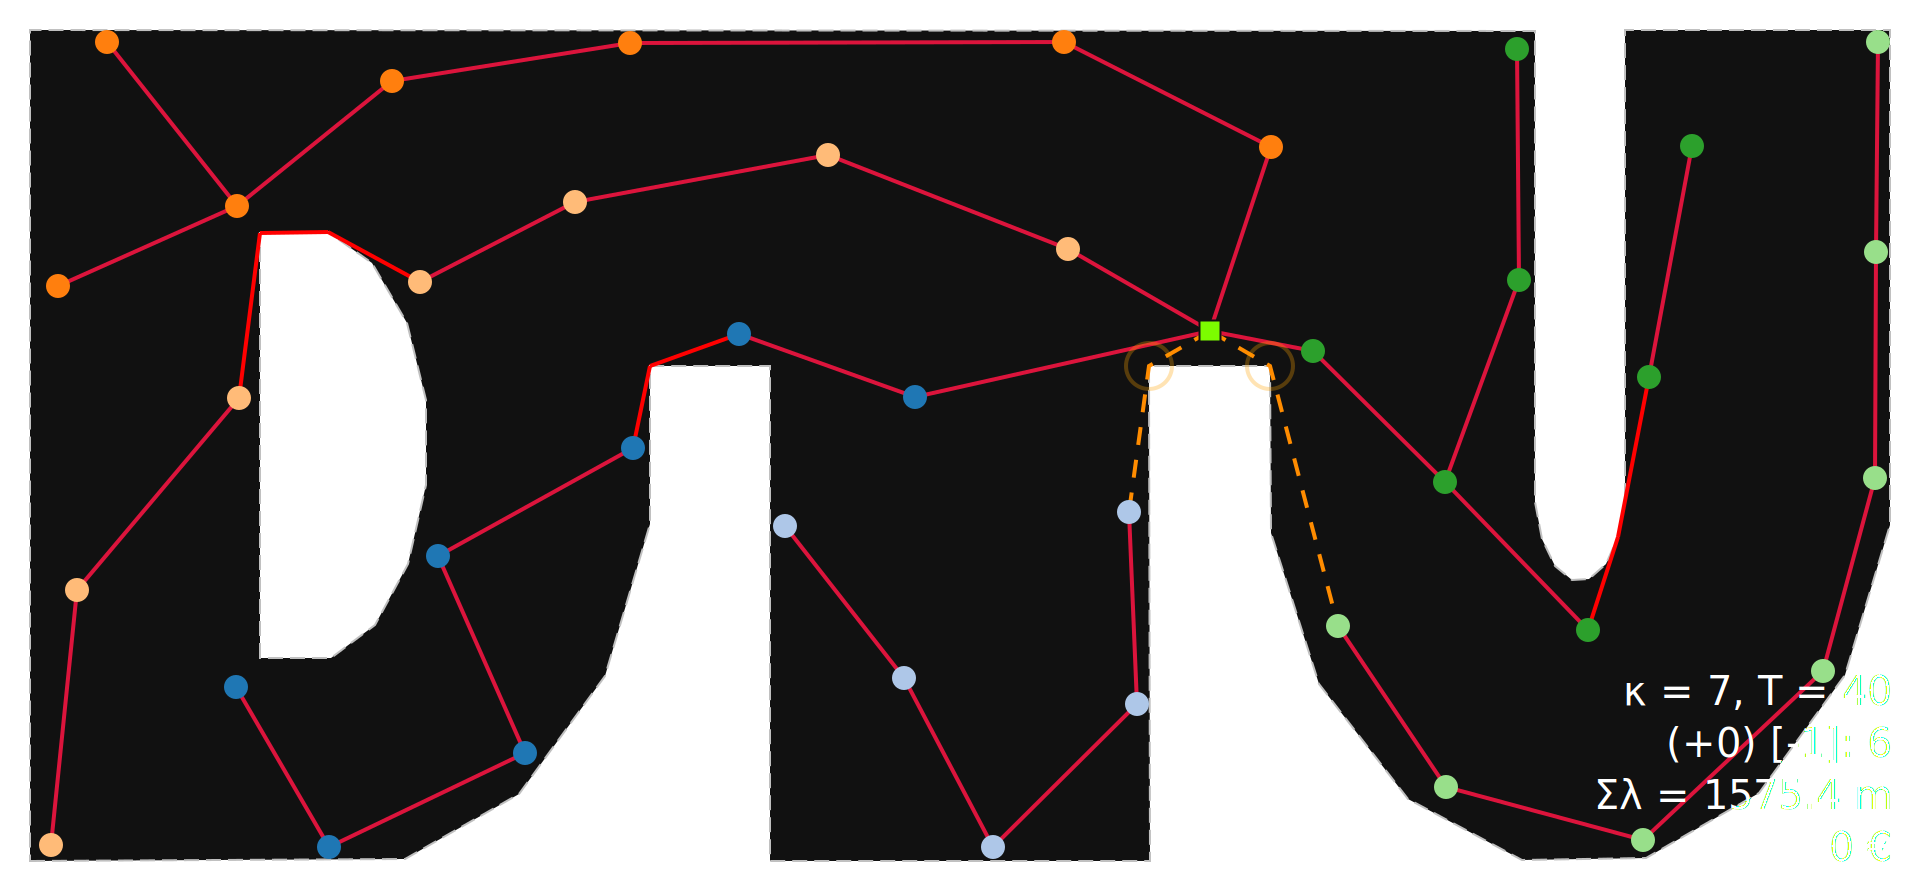

In [24]:
wfn

**MILPRouter** has two optional arguments: **ModelOptions** (what kind of solution you want) and **SolverOptions** (how long/how hard the solver searches). For more detail about `ModelOptions` and `SolverOptions` see [ModelOptions vs SolverOptions](a08_ModelOptions.ipynb)

In [25]:
from optiwindnet.api import ModelOptions
model_options = ModelOptions(
                        topology='radial',
                        feeder_limit='minimum',
                        feeder_route='segmented',
                    )
solver_options=dict(
    num_workers = 5,
)
router= MILPRouter(solver_name='ortools', time_limit=60, mip_gap=0.01, model_options=model_options, verbose=True)
res = wfn.optimize(router=router)


    - branched structure not allowed under "radial" topology


Starting CP-SAT solver v9.14.6206
Parameters: max_time_in_seconds: 60 log_search_progress: true relative_gap_limit: 0.01
Setting number of workers to 8

Initial optimization model '': (model_fingerprint: 0x16f14efd313c6050)
#Variables: 708 (#bools: 354 in floating point objective) (627 primary variables)
  - 354 Booleans in [0,1]
  - 314 in [0,6]
  - 40 in [0,7]
#kAtMostOne: 262 (#literals: 776)
#kLinear1: 708 (#enforced: 708)
#kLinear3: 2
#kLinearN: 161 (#terms: 2'078)

Starting presolve at 0.00s
The solution hint is complete, but it is infeasible! we will try to repair it.
[Scaling] Floating point objective has 354 terms with magnitude in [18.5198, 233.655] average = 64.9733
[Scaling] Objective coefficient relative error: 2.56462e-08
[Scaling] Objective worst-case absolute error: 8.53137e-05
[Scaling] Objective scaling factor: 524288
  7.06e-04s  0.00e+00d  [DetectDominanceRelations] 
  1.40e-02s  0.00e+00d  [operations_

#4       0.29s best:2140.19631 next:[1518.98019,2140.19631] no_lp (fixed_bools=0/354)
#5       0.30s best:2102.31274 next:[1518.98019,2102.31274] core (fixed_bools=0/366)
#Bound   0.35s best:2102.31274 next:[1525.81064,2102.31274] max_lp
#6       0.36s best:2041.30671 next:[1525.81064,2041.30671] no_lp (fixed_bools=0/354)
#7       0.39s best:1966.6675 next:[1525.81064,1966.6675] no_lp (fixed_bools=0/354)
#8       0.44s best:1956.59752 next:[1525.81064,1956.59752] no_lp (fixed_bools=0/354)
#9       0.45s best:1922.48027 next:[1525.81064,1922.48027] no_lp (fixed_bools=0/354)
#10      0.45s best:1919.42948 next:[1525.81064,1919.42948] no_lp (fixed_bools=0/354)
#11      0.46s best:1915.53034 next:[1525.81064,1915.53034] no_lp (fixed_bools=0/354)
#12      0.47s best:1906.98444 next:[1525.81064,1906.98444] no_lp (fixed_bools=0/354)
#Bound   0.53s best:1906.98444 next:[1541.63598,1906.98444] max_lp
#13      0.66s best:1862.01506 next:[1541.63598,1862.01505] graph_arc_lns (d=7.07e-01 s=18 t=0.

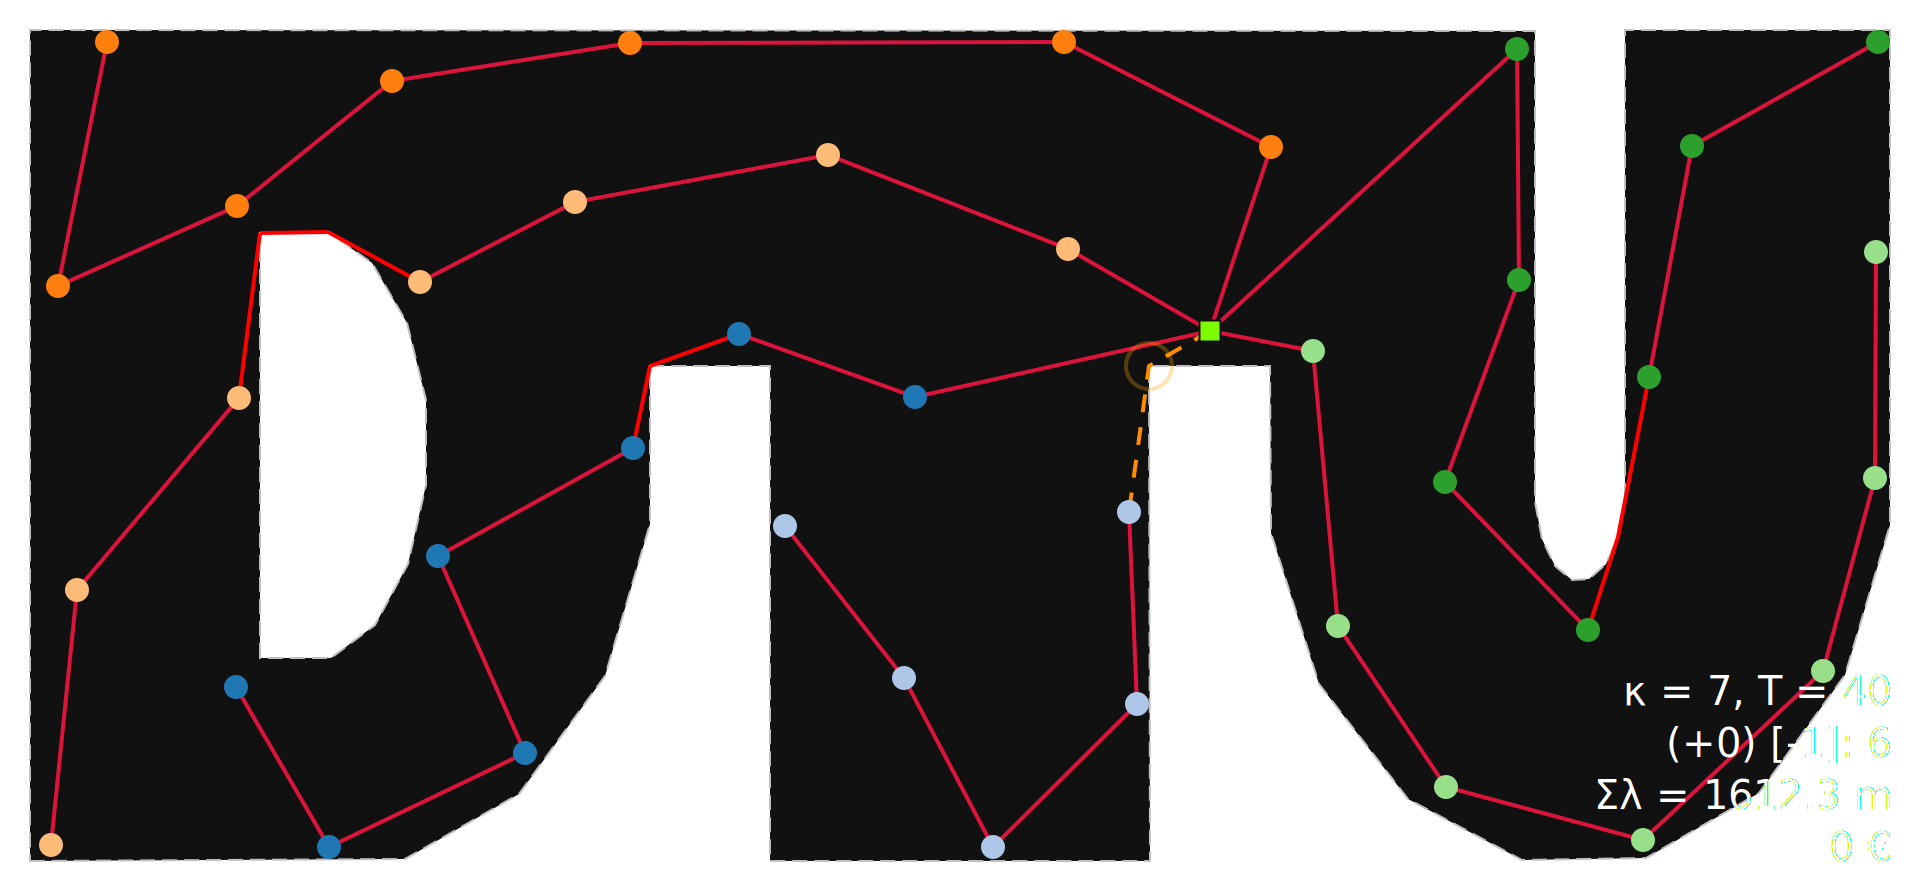

In [26]:
wfn